## LOGESTIC REGRESSION - CLASSIFICATION ALGORITHM 

## 🧬 Breast Cancer Prediction - Data Analysis & Modeling

This project involves analyzing the Breast Cancer Wisconsin dataset to predict whether a tumor is malignant or benign using machine learning. The aim is to develop a classification model based on patient cell nuclei features using Python.

We’ll perform exploratory data analysis (EDA), preprocess the data, and apply classification algorithms such as Logistic Regression and others.

### 🎯 Problem Statement

Breast cancer is one of the most common and fatal cancers among women globally. Early detection through accurate diagnosis can significantly improve survival rates.

The goal of this project is to build a model that classifies tumors as benign or malignant using various features extracted from images of breast masses.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [4]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
## modifying the above output into table form
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 📂 Dataset Description

The dataset consists of features computed from digitized images of fine needle aspirate (FNA) of breast masses.

- Total rows: 569
- Target variable: `diagnosis` (M = Malignant, B = Benign)
- Features include radius, texture, perimeter, area, smoothness, and other cellular characteristics (mean, standard error, and worst).

We will analyze patterns, visualize relationships, and build a classification model.

In [11]:
## new column label added where target is the values
df['label'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
## table structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 🧼 Data Preprocessing

- Checked and handled missing/null values
- Converted categorical target labels into numerical format (e.g., M → 1, B → 0)
- Dropped irrelevant columns such as 'id'
- Standardized the dataset for better model performance

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='label', ylabel='count'>

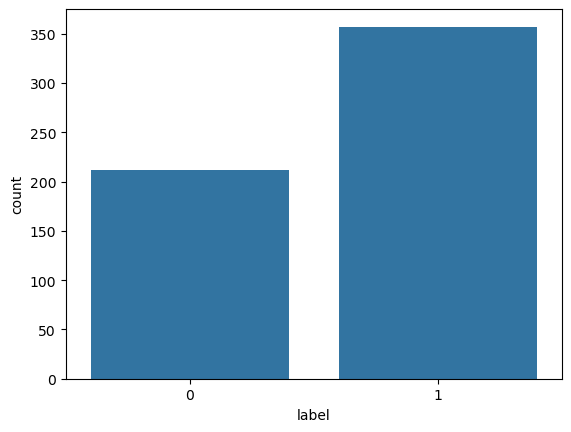

In [15]:
sns.countplot(x=df['label'])

In [17]:
corr = df.corr()

<Axes: >

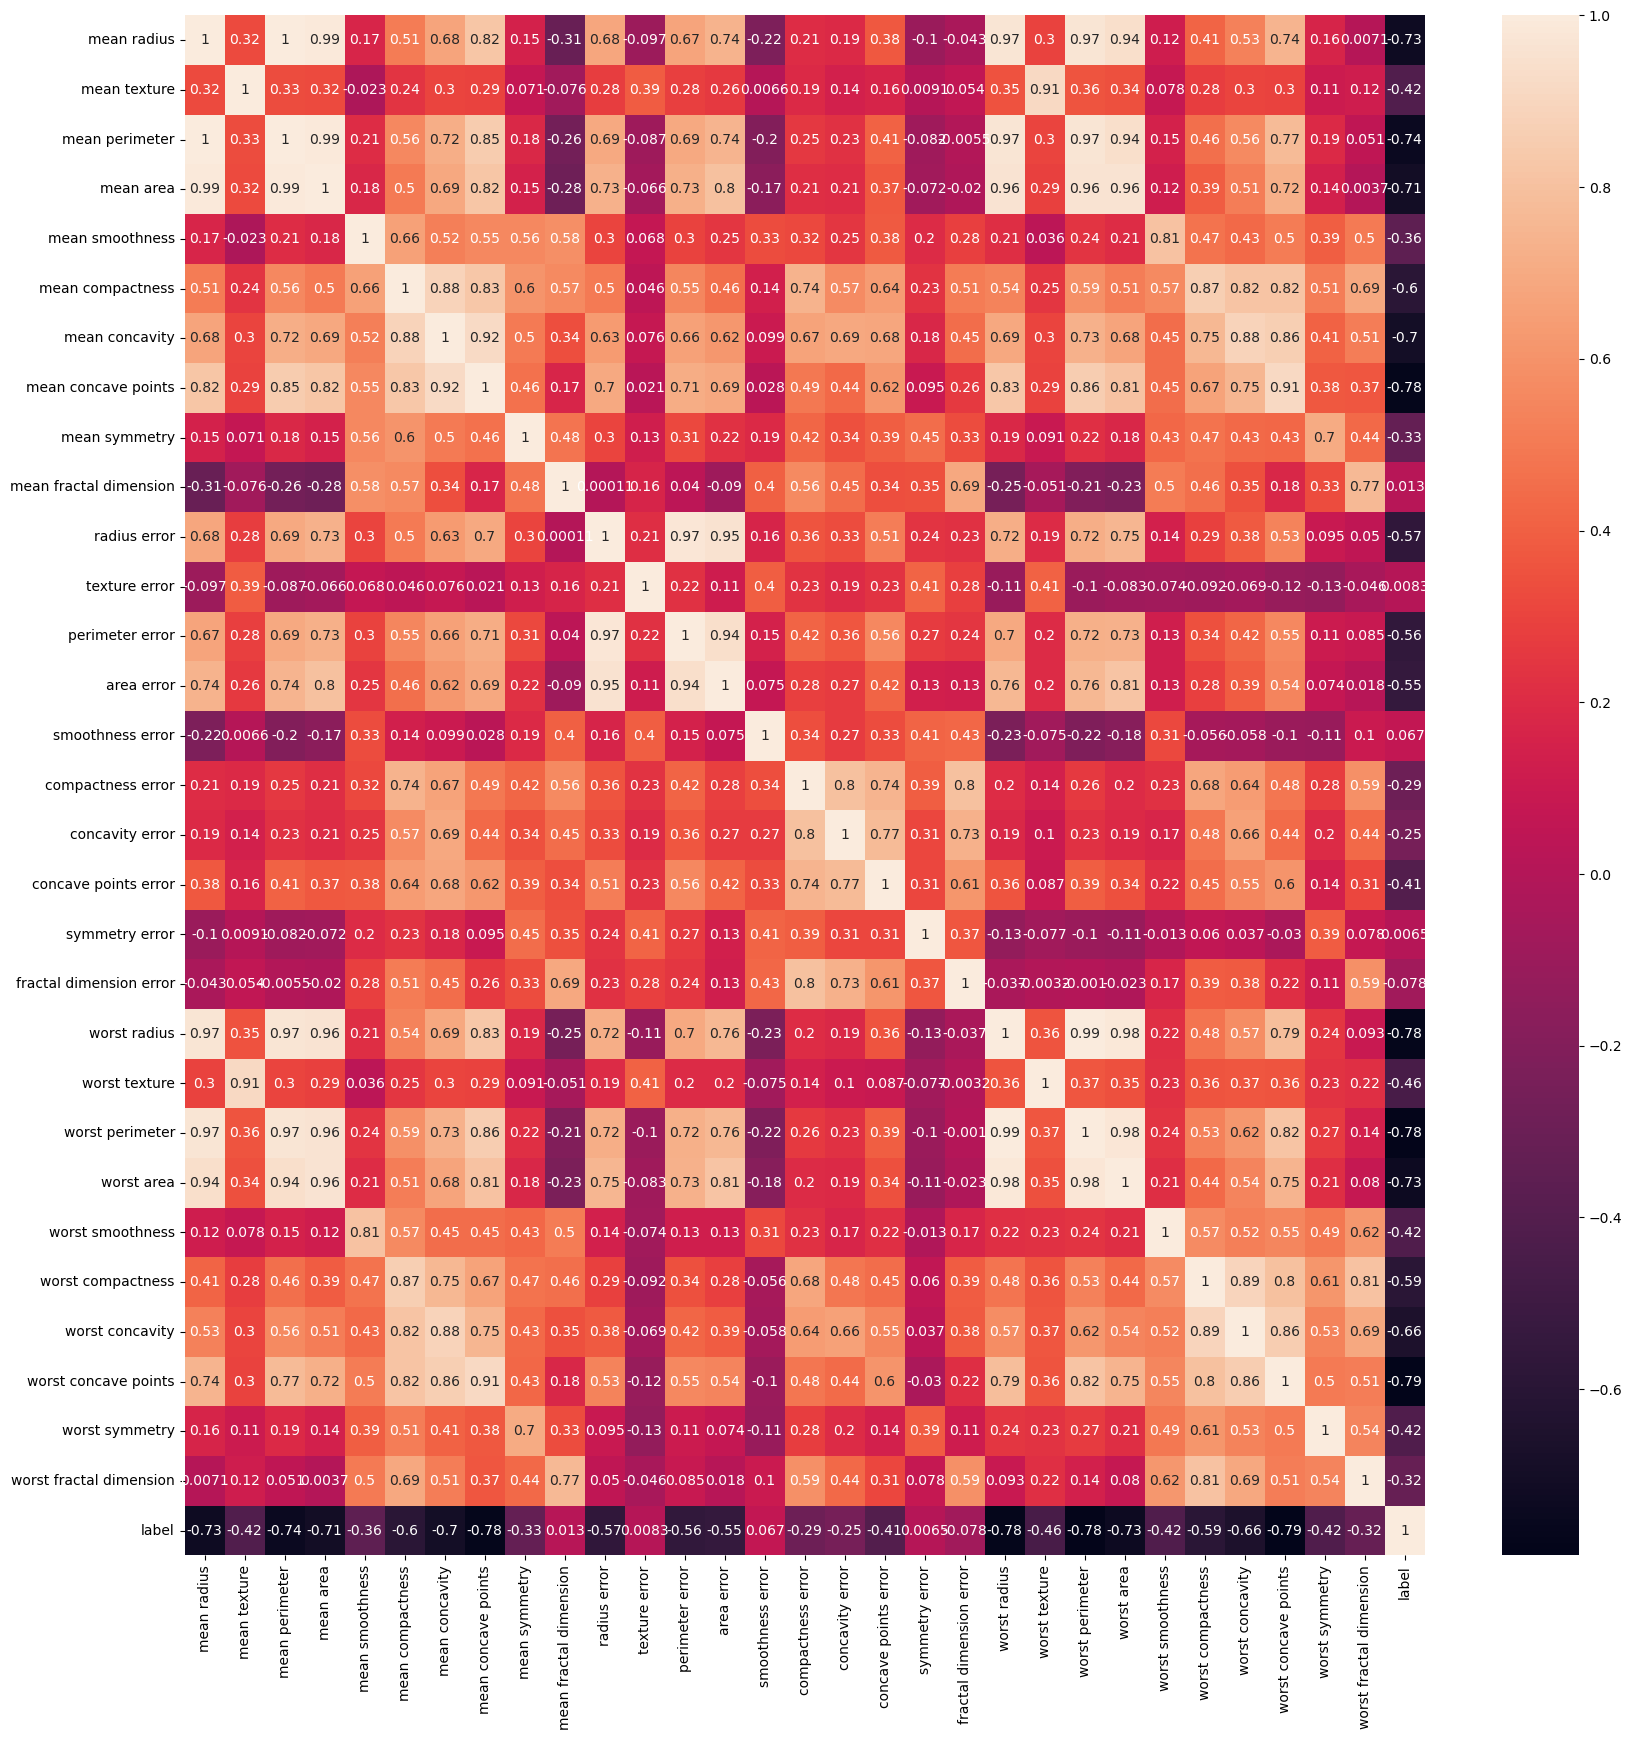

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

### 📊 Exploratory Data Analysis (EDA)

We explored:
- Class distribution to check dataset balance
- Feature distributions (e.g., radius_mean, texture_mean)
- Correlation heatmap to find highly related features
- Boxplots and histograms to understand data spread

EDA helped identify key predictors like `radius_mean`, `concave points_mean`, and `area_mean`.

In [21]:
X = df.drop('label',axis=1)
y = df['label']
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [23]:
## independent feature
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
## dependent feature
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [27]:
## split the model into train & test sizes - train - 75%, test - 25% size
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=10)

In [29]:
## check dimensions
df.shape

(569, 31)

In [31]:
X_train.shape

(426, 30)

In [33]:
X_test.shape

(143, 30)

In [35]:
## model - import logistic regression from skitkit learn 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
## fit / learn the train data
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
## ask trained model to predict on test data
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [39]:
## check if our model has performed well or not by importing classification_report, accuracy_score,confusion_matrix packages
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_pred,y_test))

## classification_report - precision, recall, f1-score(shows how much percentage has model predicted correctly), support

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.93      0.96      0.94        89

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



In [41]:
accuracy_score(y_pred,y_test)

0.9300699300699301

In [43]:
## rounding above value
round(accuracy_score(y_pred,y_test) * 100,2)

93.01

### 🧠 Model Building

Applied classification algorithms to predict cancer diagnosis:
- **Logistic Regression** (baseline model)
- Evaluated performance using accuracy score, confusion matrix, and classification report

Training/test split was done using `train_test_split()` to evaluate the model's generalization.

### 📈 Model Evaluation

- Used accuracy, precision, recall, and F1-score for performance metrics
- Confusion matrix helped visualize false positives and negatives
- Achieved good prediction results (mention accuracy if known, e.g., 96%+)

In [45]:
## very important - confusion matrix 
cm = confusion_matrix(y_pred,y_test)
cm

array([[48,  6],
       [ 4, 85]], dtype=int64)

<Axes: >

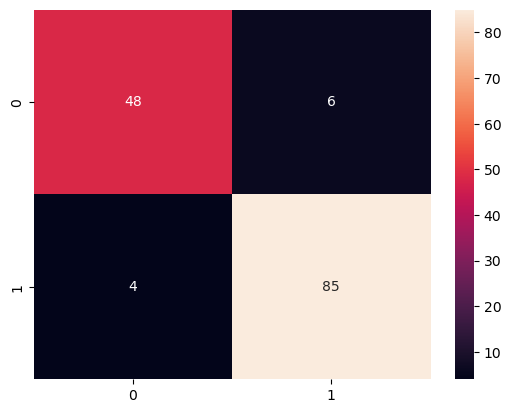

In [47]:
## whenever plotting matrix - use heatmap
sns.heatmap(cm,annot=True)

### Accuracy
The mathematical formula is :

$$Accuracy  =  \dfrac{Number\hspace{0.2cm}of\hspace{0.2cm}Correctly\hspace{0.2cm}Classified\hspace{0.2cm}Points}{Total\hspace{0.2cm}Number\hspace{0.1cm}ofPoints} = \frac{(TP+TN)}{(TP+TN+FP+FN)}$$

<ul>
$0\leq Accuracy \leq 1$  
</ul>  
    
### Recall or Sensitivity
It is measure of : All the points which are actually positive, what percentage of them are predicted to be positive.

The mathematical formula is:

$$Recall =  \frac{ TP}{(TP+FN)} $$

It shows how relevant the model is, in terms of positive results only.

### Precision
It is measure of : All the points which are predicted to be positive, what percentage of them are actually positive.

$$Precision = \frac {TP}{(TP+FP)} $$

### F1 Score

The F1 score represents the measurement of a model's performance. It is referred to as the harmonic mean of Precision and Recall. The results tending to 1 are considered as the best, and those tending to 0 are the worst.

The mathematical formula is:

$$F1 score=  \frac {2*((Precision*Recall)}{(Precision+Recall))} $$

### 💡 Key Insights

- The dataset is clean and well-balanced between malignant and benign samples
- Features like `radius_mean` and `concave points_mean` are strong indicators of malignancy
- Logistic Regression gave a strong baseline performance with high accuracy

### ✅ Conclusion

We successfully built a classification model that can predict whether a tumor is malignant or benign based on cellular characteristics. This type of analysis can assist in early diagnosis and guide treatment decisions.

Future improvements may include:
- Trying advanced models (Random Forest, SVM, XGBoost)
- Hyperparameter tuning and cross-validation
- Model deployment with a web interface (e.g., using Flask)